# **Perform a Multi-Text Classification on consumer complaint dataset**



# **Import packages**

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# **Importing the dataset through url using pandas**

In [99]:
import pandas as pd
url='https://files.consumerfinance.gov/ccdb/complaints.csv'
data = pd.read_csv(url) # use sep="," for coma separation. 
data.head()

<ipython-input-99-874fa53fa86f>:3: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60637.0,NaN,Other,Web,2023-04-25,In progress,Yes,NaN,6884739
1,2023-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NC,27886.0,NaN,NaN,Web,2023-04-25,In progress,Yes,NaN,6884755
2,2023-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60471.0,Older American,NaN,Web,2023-04-25,In progress,Yes,NaN,6884826
3,2023-04-25,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,Mercedes Benz Financial Services,FL,32837.0,NaN,NaN,Web,2023-04-25,In progress,Yes,NaN,6884722
4,2023-04-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30519.0,NaN,NaN,Web,2023-04-23,In progress,Yes,NaN,6875017


# **Exploratory Data Analysis (EDA) and Feature Engineering**
# **By info we trying to find the datatypes of all columns present in dataset** 

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578089 entries, 0 to 3578088
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 491.

**shape is used to find total no. of rows and columns present (row,column)**

In [101]:
data.shape

(3578089, 18)

**isnull().sum() is used to find the sum of null values present**

In [102]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        704092
Consumer complaint narrative    2288292
Company public response         1978001
Company                               0
State                             41211
ZIP code                          41743
Tags                            3187340
Consumer consent provided?       882067
Submitted via                         0
Date sent to company                  0
Company response to consumer          4
Timely response?                      0
Consumer disputed?              2809730
Complaint ID                          0
dtype: int64

In [103]:
data['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    1812528
Debt collection                                                                  479460
Mortgage                                                                         375724
Credit card or prepaid card                                                      185604
Checking or savings account                                                      163323
Credit reporting                                                                 140429
Credit card                                                                       89190
Bank account or service                                                           86205
Student loan                                                                      74130
Money transfer, virtual currency, or money service                                53413
Vehicle loan or lease                                                             42811
Consumer Loan                   

**<!-- Replacing the features inside the columns features -->**

# **Replacing the columnn features**

In [104]:
data.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card'
             }}, 
            inplace= True)

In [105]:

df=data[(data['Product'] =='Mortgage') | (data['Product'] =='Debt collection') | (data['Product'] =='Consumer Loan') | (data['Product'] =='Credit reporting, repair, or other')]

df.head()

# 0 Credit reporting, repair, or
# other
# 1 Debt collection
# 2 Consumer Loan
# 3 Mortgage

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-25,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60637.0,NaN,Other,Web,2023-04-25,In progress,Yes,NaN,6884739
1,2023-04-25,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NC,27886.0,NaN,NaN,Web,2023-04-25,In progress,Yes,NaN,6884755
2,2023-04-25,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60471.0,Older American,NaN,Web,2023-04-25,In progress,Yes,NaN,6884826
3,2023-04-25,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,Mercedes Benz Financial Services,FL,32837.0,NaN,NaN,Web,2023-04-25,In progress,Yes,NaN,6884722
4,2023-04-23,"Credit reporting, repair, or other",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30519.0,NaN,NaN,Web,2023-04-23,In progress,Yes,NaN,6875017


In [106]:
df.shape

(2839716, 18)

**The dataset contains features that are not necessary to solve our multi-classification problem. For this text classification problem, we are going to build another dataframe that contains ‘Product’ and ‘Consumer complaint narrative’ (renamed as 'Consumer_complaint')**

In [107]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(988867, 2)

In [108]:
df1.head()

,Product,Consumer_complaint
67,"Credit reporting, repair, or other",On or about XX/XX/2015 I had financed a 2015 X...
97,"Credit reporting, repair, or other",I HAVE DISPUTED WITH EXPERIAN AND XXXX OVER MY...
108,"Credit reporting, repair, or other",Previously I have filed a complaint with this ...
150,"Credit reporting, repair, or other",I want to inform the Credit Bureaus AGAIN that...
194,Debt collection,This company is reporting information without ...


## **Out of 100 what percent of complaints are registered **

In [109]:
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

34.8

**Graphical representation of product category vs complaints**

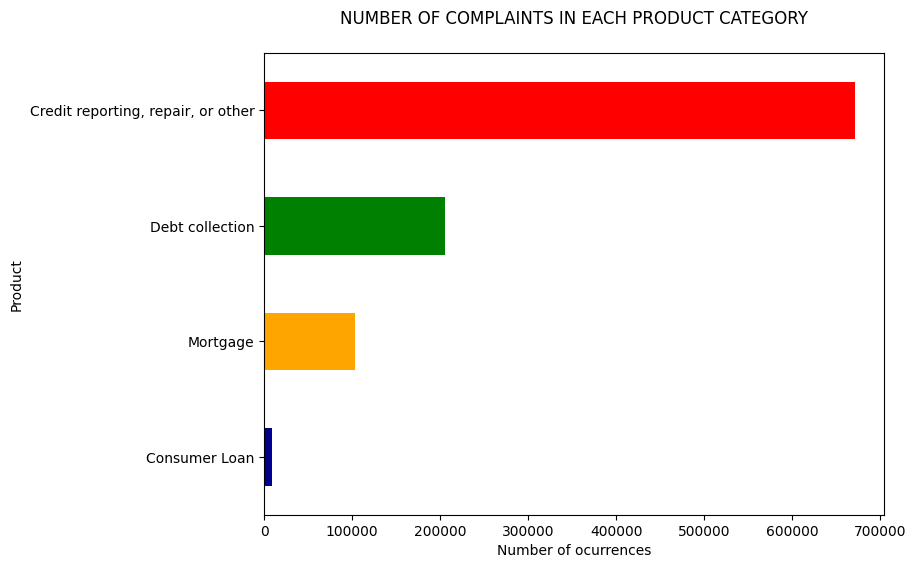

In [110]:
fig = plt.figure(figsize=(8,6))
colors = ['darkblue','orange','green','red']
df1.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);


In [111]:
df['Consumer disputed?'].value_counts()

No     438756
Yes    105887
Name: Consumer disputed?, dtype: int64

<Axes: xlabel='Product'>

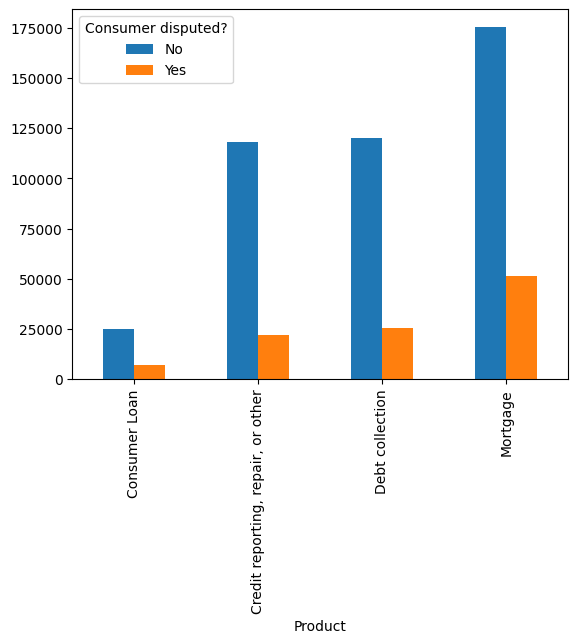

In [112]:
pd.crosstab(df['Product'],df['Consumer disputed?']).plot(kind='bar')

In [113]:
df=df.drop('Complaint ID',axis=1)

<Axes: xlabel='Timely response?', ylabel='count'>

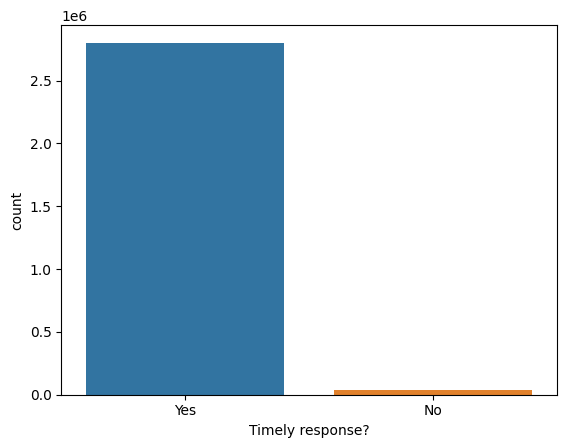

In [114]:
sns.countplot(x='Timely response?',data=df)

In [115]:
df['State'].value_counts()

FL    341164
CA    325133
TX    302788
GA    203194
NY    171749
       ...  
AA        36
MP        30
MH        22
AS        20
PW         9
Name: State, Length: 63, dtype: int64

**pie chart represenation of Florida state vs Issues filed by the consumer**

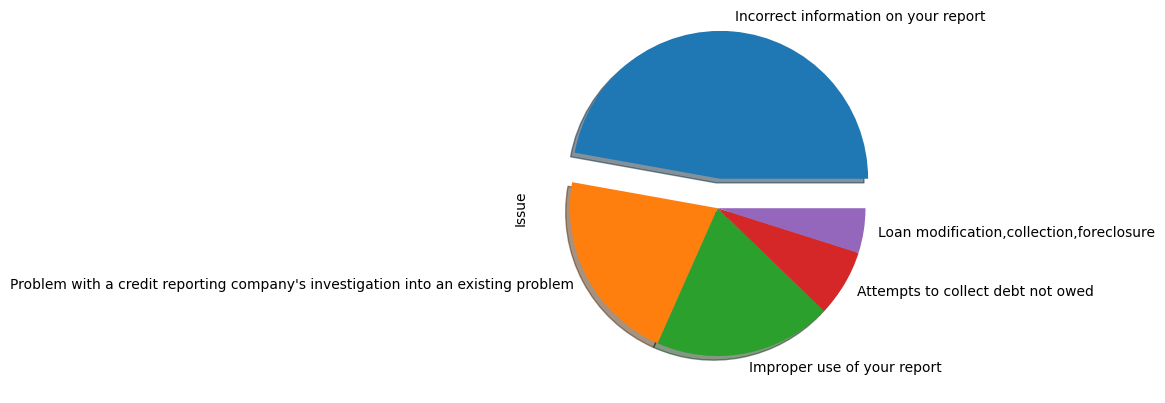

In [116]:
df[df['State']=='FL']['Issue'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')



In [117]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import iplot
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Credit reporting, repair, or other    68.77
Debt collection                       16.88
Mortgage                              13.23
Consumer Loan                          1.11
Name: Product, dtype: float64


** Bases on chart depiction,most of the consumer's problem are on credit reporting,repairt and other with 82.7%**

In [118]:
df1.head()


,Product,Consumer_complaint
67,"Credit reporting, repair, or other",On or about XX/XX/2015 I had financed a 2015 X...
97,"Credit reporting, repair, or other",I HAVE DISPUTED WITH EXPERIAN AND XXXX OVER MY...
108,"Credit reporting, repair, or other",Previously I have filed a complaint with this ...
150,"Credit reporting, repair, or other",I want to inform the Credit Bureaus AGAIN that...
194,Debt collection,This company is reporting information without ...


**using hashmap converting the columns features of Produc into values for prediction**

In [119]:
df1['category_id'] = df1['Product'].factorize()[0]
from io import StringIO
category_id_df1 = df1[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df1.values)
id_to_category = dict(category_id_df1[['category_id', 'Product']].values)

In [120]:
category_to_id

{'Credit reporting, repair, or other': 0,
 'Debt collection': 1,
 'Mortgage': 2,
 'Consumer Loan': 3}

## **For early prediction from the original dataset picking up 500 samples.**

In [162]:
df2 = df1.sample(2000, random_state=1).copy()

In [122]:
df2.shape

(500, 3)

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# **TfidfTransformer(term frequency and inverse document frequency):TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.**


In [164]:

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 2000 complaints is represented by 6078 features (TF-IDF score of unigrams and bigrams)


# **Splitting the dataset into training and target variable**

In [165]:

X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

# **Multi-Classification models**
# **The classification models evaluated are:**

Random Forest

Linear Support Vector Machine

Multinomial Naive Bayes

Logistic Regression.

In [166]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.6950
1,RandomForestClassifier,1,0.6950
2,RandomForestClassifier,2,0.6950
3,RandomForestClassifier,3,0.7000
4,RandomForestClassifier,4,0.6925
5,LinearSVC,0,0.8650
6,LinearSVC,1,0.8850
7,LinearSVC,2,0.8750
8,LinearSVC,3,0.8850
9,LinearSVC,4,0.8700


# **Comparison of model performance**

In [167]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.8760,0.008944
LogisticRegression,0.8635,0.009117
MultinomialNB,0.8195,0.011236
RandomForestClassifier,0.6955,0.002739


**Out of 4 models algorithm linearSVC is best with accuracy of 87.6%**

# **Model Evaluation**

In [168]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# **Precision is a measure of how many of the positive predictions made are correct (true positives)**
# **Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data**
# **F1-Score is a measure combining both precision and recall(harmonc Mean)**

In [169]:
y_pred

array([0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [138]:
df2['Product'].value_counts()

Credit reporting, repair, or other    346
Debt collection                       110
Mortgage                               42
Consumer Loan                           2
Name: Product, dtype: int64

In [170]:
# print('t\t\t\t CLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))

                                    precision    recall  f1-score   support

                          Mortgage       0.90      0.96      0.93       356
                   Debt collection       0.78      0.63      0.69        83
Credit reporting, repair, or other       0.91      0.89      0.90        57
                     Consumer Loan       0.00      0.00      0.00         4

                          accuracy                           0.89       500
                         macro avg       0.65      0.62      0.63       500
                      weighted avg       0.87      0.89      0.88       500



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [171]:
conf_mat = confusion_matrix(y_test, y_pred)

# **Prediction**

In [172]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)



In [173]:
# df2['Consumer_complaint'].values

In [174]:
new_complaint = """I contacted Transunion Credit agency to get my credit score. I tried online at the website and tried calling. I spoke with representative and said I would Ike to know what my credit score is. I was told I would have to pay for a membership. I explained to representative that I can go online to XXXX  and XXXX  and look at my credit score instantly. Why does Transunion charge a person a fee to get information on their owe credit? So I would like this to be investigated. Transunion should not be making money off of one 's own information."""

print(model.predict(fitted_vectorizer.transform([new_complaint])))
df1[df1['Consumer_complaint'] == new_complaint]

['Credit reporting, repair, or other']


,Product,Consumer_complaint,category_id
1012586,"Credit reporting, repair, or other",I contacted Transunion Credit agency to get my...,0
